In [38]:
# import os
from glob import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

# Concatenating all CSVs

In [11]:
dfs = [pd.read_csv(pathname) for pathname in glob(os.path.join('data', '*.csv'))]

In [13]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [17]:
df.to_csv('skytrax.csv', index=False)

# Cleaning data

In [24]:
df.head()

,author_review_count,rating,title,date,location,body,Seat Type,Aircraft Type,Seat Layout,Date Flown,...,Recommended,airline_slug,airline,Viewing Tv Screen,Power Supply,Sleep Comfort,Sitting Comfort,Seat/bed Width,Seat/bed Length,Seat Privacy
0,0.0,0.3,"""seat was not comfortable""",2019-07-22,Malaysia,With their newer A320 aircraft leg room is awf...,Economy Class,A320,3x3,July 2019,...,no,airasia,AirAsia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.6,"""Check in was easy""",2019-04-06,Australia,Check in was easy and boarding I was in zone o...,Economy Class,A320,3x3,April 2019,...,True,airasia,AirAsia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,0.7,"""A solid experience""",2019-04-01,Australia,"A solid experience from start to finish, espec...",Economy Class,A320,3x3,March 2019,...,True,airasia,AirAsia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.1,"""my 4yr old and I allocated different seats""",2018-01-14,Australia,I discovered upon boarding that my four-year-o...,Economy Class,A330-300,3x3x3,January 2018,...,no,airasia,AirAsia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.7,"""space between was relatively good""",2017-08-24,Indonesia,"I got 14A seat, near emergency exit door. So t...",Economy Class,A320,3x3,August 2017,...,True,airasia,AirAsia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.concat([df.isnull().sum(), df.eq('').sum()], keys = ['Nulls', 'Empty'], axis = 1)

,Nulls,Empty
author_review_count,0,0
rating,1,0
title,0,0
date,0,0
location,1,0
body,1,0
Seat Type,3,0
Aircraft Type,4,0
Seat Layout,0,0
Date Flown,965,0


<AxesSubplot:>

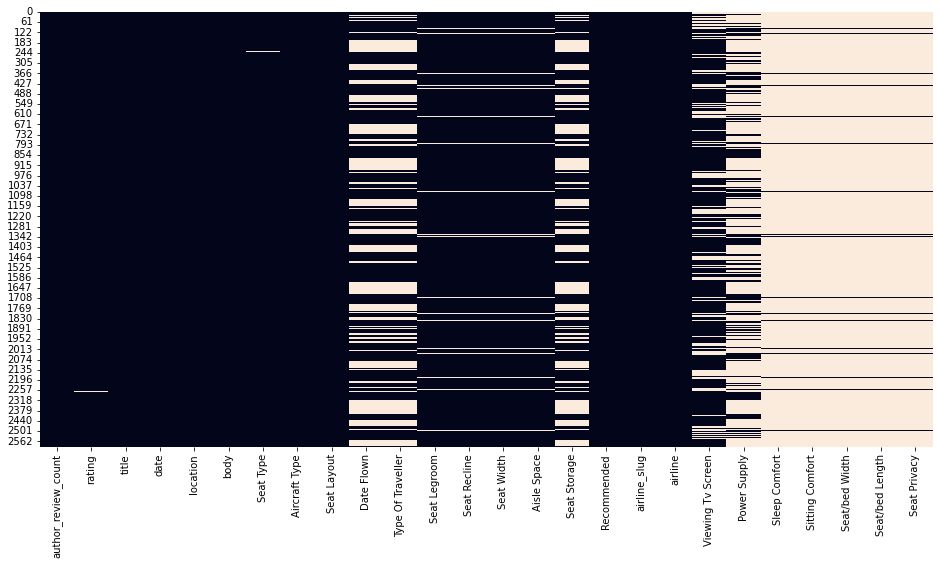

In [39]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

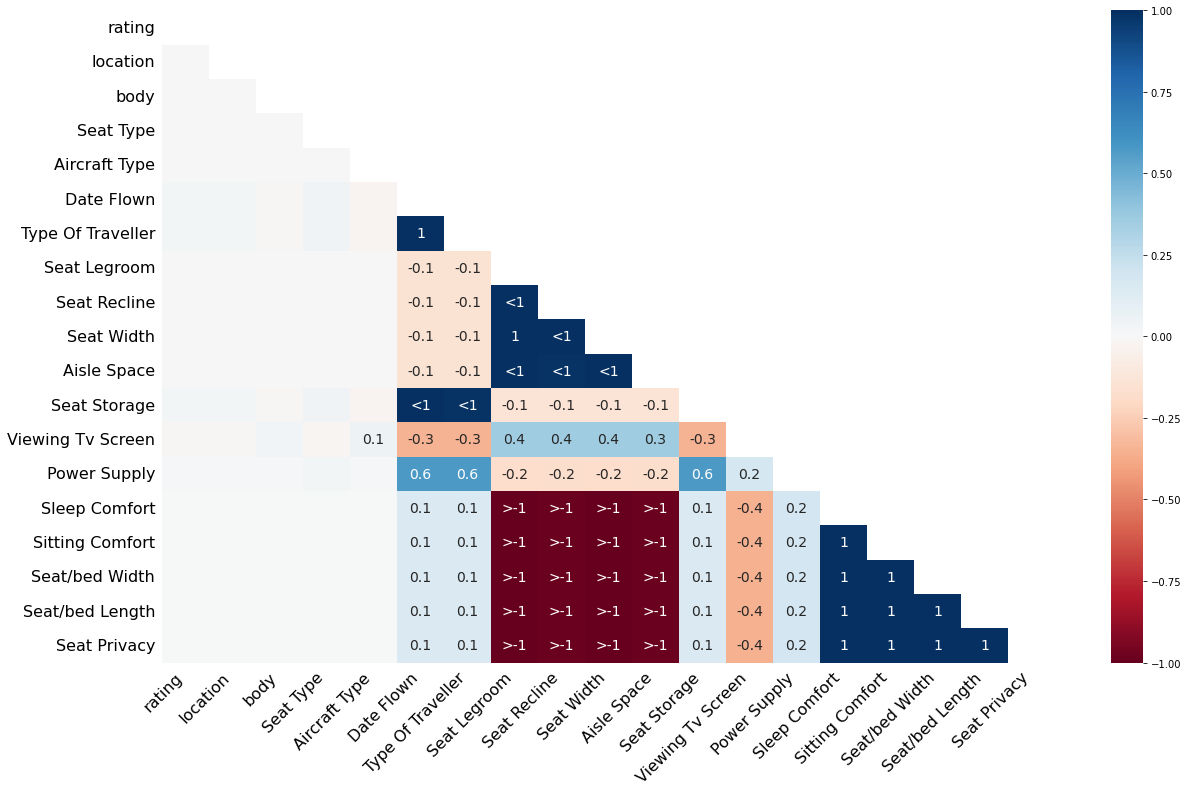

In [40]:
msno.heatmap(df)

In [47]:
df.groupby(df.airline)['Seat Width'].apply(lambda x: x.isnull().sum())

#pd.concat([grouped.isnull().sum(), grouped.eq('').sum()], keys = ['Nulls', 'Empty'], axis = 1)

airline
9 Air                        0
ANA All Nippon Airways       0
Aegean Airlines              1
Aer Lingus                   0
Aeroflot Russian Airlines    0
                            ..
WestJet Airlines             0
Wizz Air                     0
airblue                      0
easyJet                      0
flydubai                     0
Name: Seat Width, Length: 165, dtype: int64

In [54]:
x = df[list(df.drop('airline', axis=1))].isnull().groupby(df.airline).sum()

<AxesSubplot:ylabel='airline'>

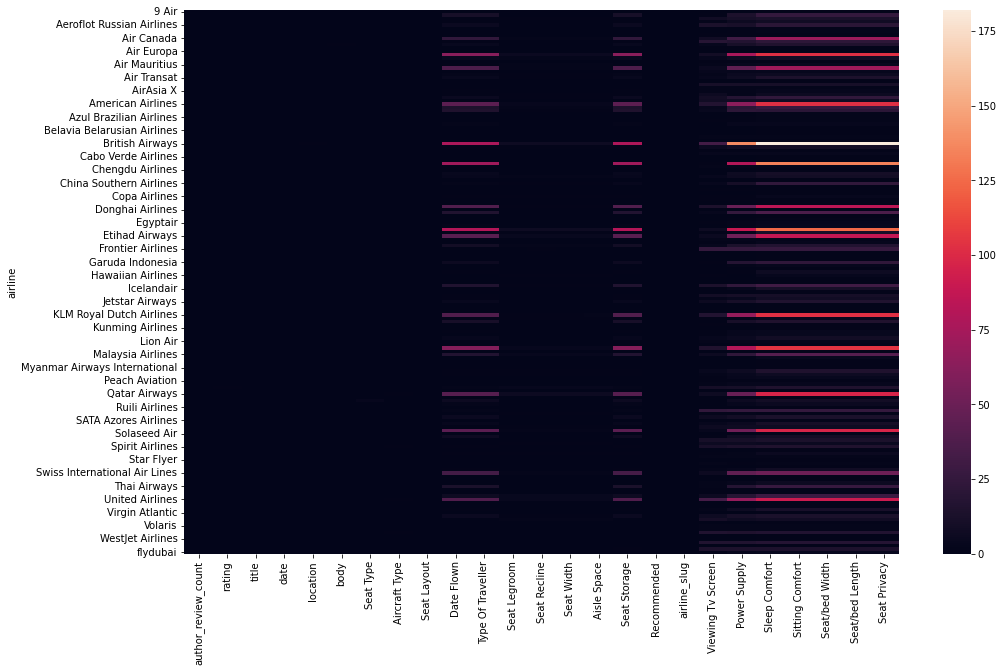

In [61]:
plt.figure(figsize=(16, 10))
sns.heatmap(x)